# Pymaceuticals Inc.
---

### Analysis

The study included 249 mice treated for cancer with different drug regimens. Mice with varying tumor sizes, weights, and genders participated. The summary statistics indicate that the mice responded differently to the various drugs, showing differences in mean and median tumor sizes, tumor variance, and standard deviation. The standard error of the mean was very low. Bar and Pie charts show, Capomulin and Ramicane treated the highest number of mice.  

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
df.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [8]:
# Checking the number of mice.
mice=df["Mouse ID"].nunique()
mice

249

In [9]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mice = df[df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Optional: Get all the data for the duplicate mouse ID.


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Drop_Mice = df.drop_duplicates(subset="Mouse ID", keep='first')
Drop_Mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [12]:
# Checking the number of mice in the clean DataFrame.
mice_Dropped=Drop_Mice["Mouse ID"].nunique()
mice_Dropped

249

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
Mean = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
Median = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()  
std_dev = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
variance = std_dev ** 2
n = len(df['Tumor Volume (mm3)'])
SEM = std_dev / np.sqrt(n)

summary = summary = pd.DataFrame({
    "Mean Tumor Volume": Mean,
    "Median Tumor Volume": Median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev.": std_dev,
    "Tumor Volume Std. Err.": SEM,
})
summary.head(10)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.114800
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.144068
Infubinol,52.884795,51.820584,43.128684,6.567243,0.150941
Ketapril,55.235638,53.698743,68.553577,8.279709,0.190300
Naftisol,54.331565,52.509285,66.173479,8.134708,0.186968
Placebo,54.033581,52.288934,61.168083,7.821003,0.179758
Propriva,52.322552,50.854632,42.351070,6.507770,0.149574
Ramicane,40.216745,40.673236,23.486704,4.846308,0.111387
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.177216


In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Std_Dev='std',
    SEM='sem'
).reset_index()

print('Tumor Volume (mm3)')
summary_df

Tumor Volume (mm3)


,Drug Regimen,Mean,Median,Variance,Std_Dev,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

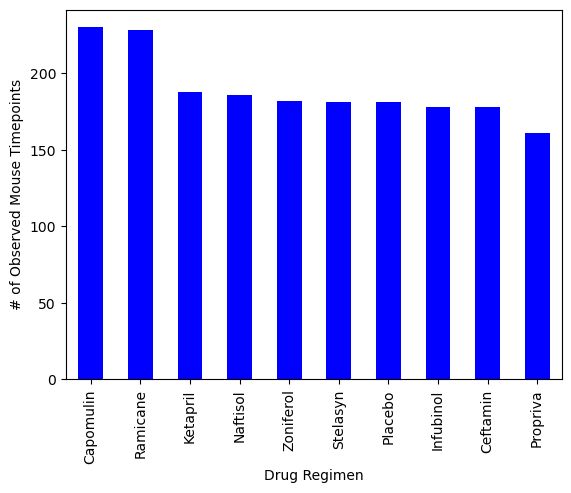

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = df['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar', color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

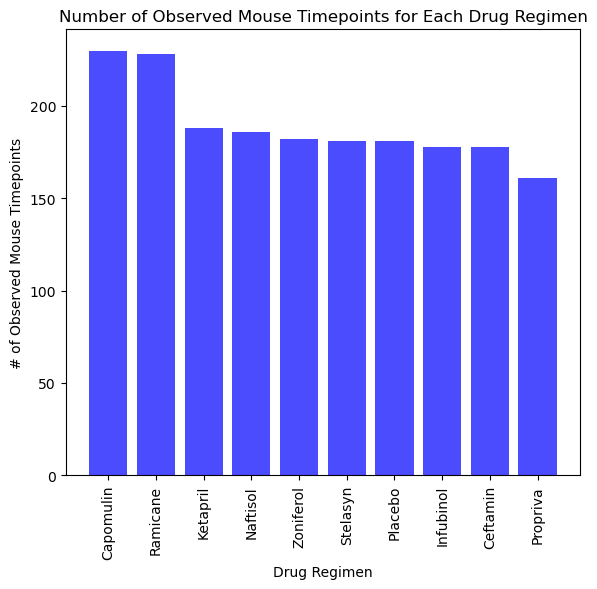

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = df['Drug Regimen'].value_counts()


plt.figure(figsize=(6, 6))
plt.bar(drug_counts.index, drug_counts.values, color='blue', alpha=0.7, align="center")

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Number of Observed Mouse Timepoints for Each Drug Regimen")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

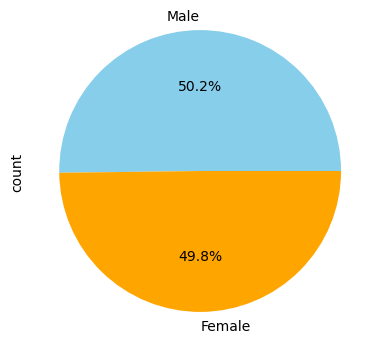

In [17]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
unique_mice = df.drop_duplicates(subset='Mouse ID')

gender_counts = unique_mice['Sex'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=0, colors=['skyblue', 'orange'])
plt.text(-1.25, 0.0, 'count', rotation=90, fontsize=10, ha='right', va='center')
plt.axis('equal') 
plt.show()

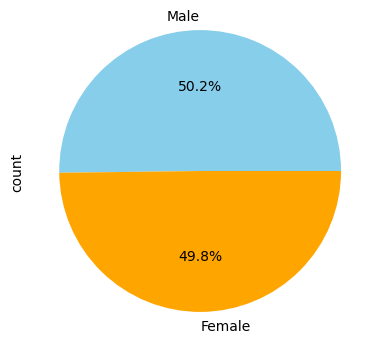

In [18]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
unique_mice = df.drop_duplicates(subset='Mouse ID')
# Get the unique mice with their gender
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
plt.figure(figsize=(4, 4))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=0, colors=['skyblue', 'orange'])
plt.text(-1.25, 0.0, 'count', rotation=90, fontsize=10, ha='right', va='center')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = df.groupby('Mouse ID')['Timepoint'].max().reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_df = pd.merge(last_timepoint, df, on=['Mouse ID', 'Timepoint'], how='left')

tumor_volumes = merged_df[merged_df['Drug Regimen'].isin(treatment)]

print(tumor_volumes[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']])


    Mouse ID Drug Regimen  Tumor Volume (mm3)
0       a203    Infubinol           67.973419
1       a251    Infubinol           65.525743
3       a275     Ceftamin           62.999356
6       a411     Ramicane           38.407618
7       a444     Ramicane           43.047543
..       ...          ...                 ...
239     y769     Ceftamin           68.594745
240     y793    Capomulin           31.896238
241     y865     Ceftamin           64.729837
245     z578     Ramicane           30.638696
246     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    treatment_data = df[df['Drug Regimen'] == treatment]
    last_timepoints = treatment_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
    final_volumes = pd.merge(last_timepoints, treatment_data, on=['Mouse ID', 'Timepoint'], how='left')
    tumor_vol_data.append(final_volumes['Tumor Volume (mm3)'])
    quartiles = final_volumes['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    # Locate the rows which contain mice on each drug and get the tumor volumes
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # add subset
    outliers = final_volumes[(final_volumes['Tumor Volume (mm3)'] < lower_bound) | 
                             (final_volumes['Tumor Volume (mm3)'] > upper_bound)]
    

    # Determine outliers using upper and lower bounds
    print(f"{treatment} IQR: {iqr}")
    print(f"{treatment} Lower Bound: {lower_bound}")
    print(f"{treatment} Upper Bound: {upper_bound}")
    print(f"{treatment} Outliers:")
    print(outliers[['Mouse ID', 'Tumor Volume (mm3)']])
    print("\n")

Capomulin IQR: 7.781863460000004
Capomulin Lower Bound: 20.70456164999999
Capomulin Upper Bound: 51.83201549
Capomulin Outliers:
Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []


Ramicane IQR: 9.098536719999998
Ramicane Lower Bound: 17.912664470000003
Ramicane Upper Bound: 54.30681135
Ramicane Outliers:
Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []


Infubinol IQR: 11.477135160000003
Infubinol Lower Bound: 36.83290494999999
Infubinol Upper Bound: 82.74144559000001
Infubinol Outliers:
  Mouse ID  Tumor Volume (mm3)
5     c326           36.321346


Ceftamin IQR: 15.577752179999997
Ceftamin Lower Bound: 25.355449580000002
Ceftamin Upper Bound: 87.66645829999999
Ceftamin Outliers:
Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []




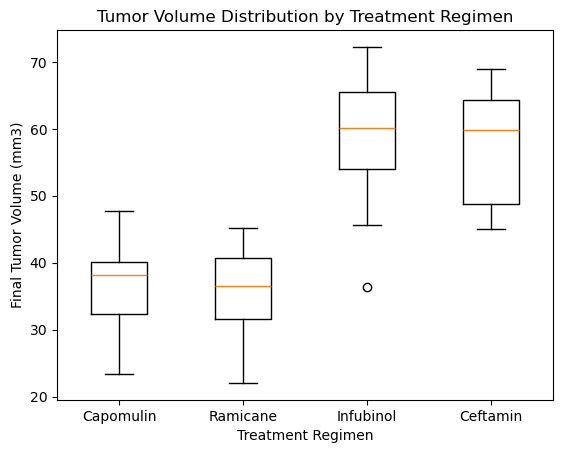

In [21]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# Example data preparation
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = [tumor_volumes[tumor_volumes['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatments]
# Create a figure and axis
fig, ax = plt.subplots()

# Create a box plot
ax.boxplot(tumor_vol_data, labels=treatments)

# Set plot title and labels
ax.set_title('Tumor Volume Distribution by Treatment Regimen')
ax.set_xlabel('Treatment Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

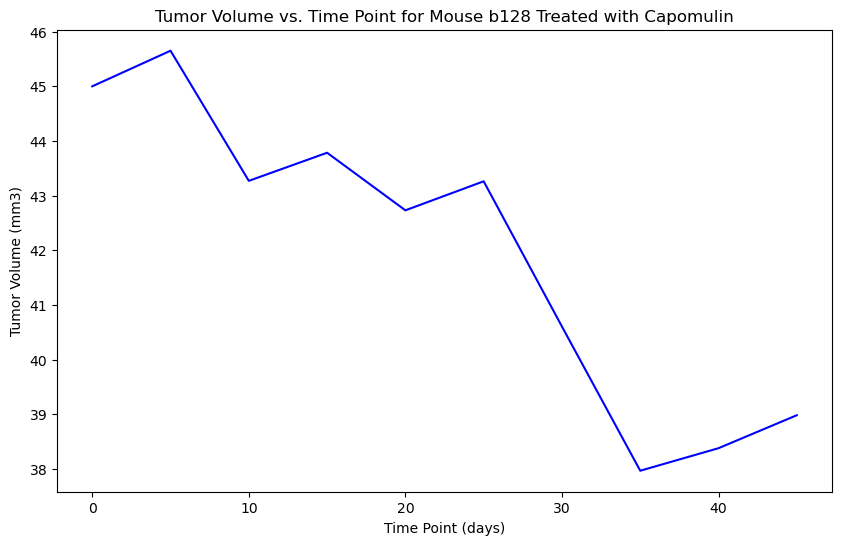

In [22]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = df[df['Drug Regimen'] == 'Capomulin']

single_mouse_id = capomulin_data['Mouse ID'].iloc[0]

single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == single_mouse_id]
plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], color='b')

plt.title(f'Tumor Volume vs. Time Point for Mouse {single_mouse_id} Treated with Capomulin')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

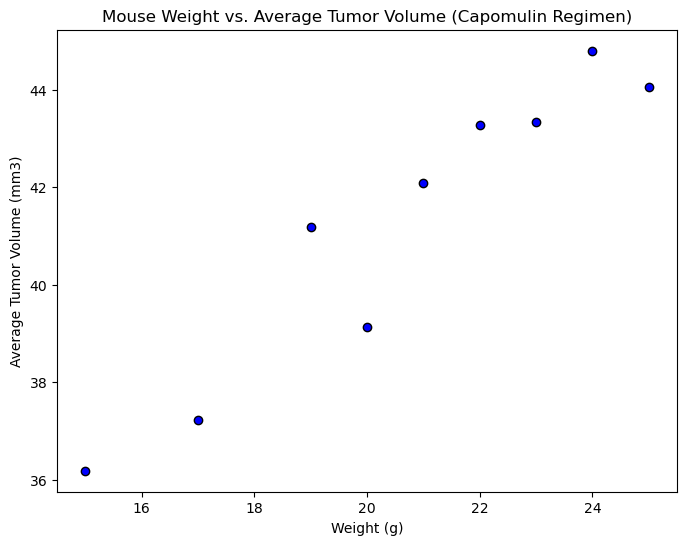

In [23]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


# Group the data by mouse weight and calculate the average tumor volume
average_tumor_volume = capomulin_data.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()

# Generate the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], c='blue', edgecolors='black')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

Correlation coefficient: 0.9505243961855268


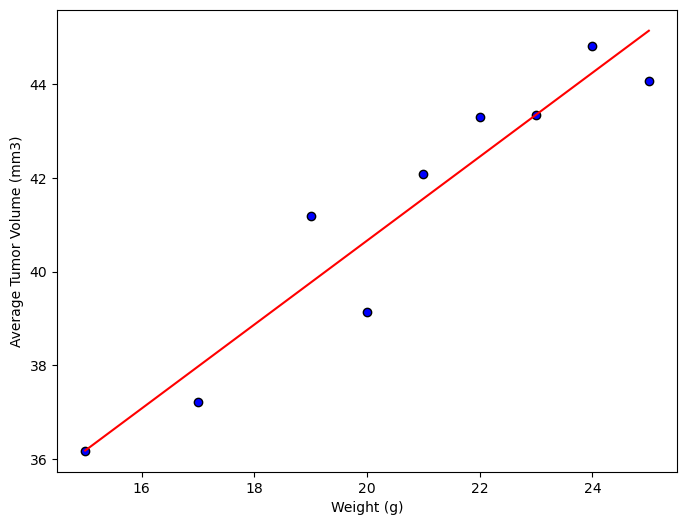

In [24]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = average_tumor_volume['Weight (g)']
y_values = average_tumor_volume['Tumor Volume (mm3)']

correlation_coefficient = x_values.corr(y_values)
print(f"Correlation coefficient: {correlation_coefficient}")

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, c='blue', edgecolors='black', label='Data Points')
plt.plot(x_values, slope * x_values + intercept, color='red', label='Linear Regression Line')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()